# this is a file for calculating the Lagrangian rate of change of the log-scale $Chl_a$ using  $\frac{D \ ( log_{10} Chl_a)}{Dt}:=\frac{1}{Chl_a}\frac{D \ ( Chl_a)}{Dt}$
* aaa
  * aaa
    * aaa
    * aaa

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xarray as xr

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# load the floats data 
# ********************
# *** CSV files ***
# ********************
# load the floats data, take the lon and lat as list out and calculate the distance

# load CSV output    
# some how the CSV Format has some compatibility issues here
# see readme file for the file convetion in the experiments,
# for instance "3" indicates distance is addd to the dataset 
df_chl_out_5D_3 = pd.read_csv('./data_collector_modisa_chla9km/df_chl_out_5D_modisa_3.csv', \
                              index_col='index')
df_chl_out_5D_3

,id,time,lon,var_lon,vn,var_tmp,spd,var_lat,temp,lat,ve,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist
index,,,,,,,,,,,,,,,,
5181,10206,2002-11-01,67.400875,0.001188,6.497542,1000.000000,11.098375,0.000411,NaN,10.819333,-6.816792,0.132351,-0.878273,-0.011445,NaN,512.041
5183,11089,2002-11-01,65.187083,0.000106,5.029292,0.003775,12.775208,0.000057,28.979875,14.236667,-9.695500,0.124708,-0.904106,-0.006008,NaN,813.115
5203,34710,2002-11-01,63.136583,0.000115,12.004000,0.001725,12.873292,0.000061,28.993542,16.952292,1.252542,0.404965,-0.392582,0.069651,-1.157071,589.642
5440,10206,2002-11-07,67.149208,0.001453,3.659208,1000.000000,6.336958,0.000476,NaN,11.107000,-2.266292,0.130267,-0.885166,-0.002084,NaN,540.917
5442,11089,2002-11-07,64.589250,0.000133,-1.580333,0.003873,16.956875,0.000068,28.978875,14.336875,-15.959458,0.188381,-0.724962,0.063673,-1.196042,878.551
5444,15707,2002-11-07,67.265333,0.000158,-22.637667,1000.000000,26.327625,0.000079,NaN,13.365542,-9.709250,0.164893,-0.782798,0.005629,-2.249550,570.016
5462,34710,2002-11-07,63.098417,0.000156,13.738750,0.001941,15.450125,0.000078,28.687667,17.482833,-4.776875,0.383276,-0.416488,-0.021689,NaN,548.641
5468,34721,2002-11-07,67.971208,0.000136,3.860583,0.001854,16.149333,0.000068,29.455000,12.624125,10.850542,0.144376,-0.840506,0.001377,-2.861171,471.103
5701,11089,2002-11-13,63.741208,0.000116,-11.590250,0.003512,25.847125,0.000061,28.424792,14.022917,-22.455833,0.317086,-0.498823,0.128705,-0.890406,836.575


In [3]:
check1 = df_chl_out_5D_3.chl_rate/ df_chl_out_5D_3.chlor_a 
check2 = df_chl_out_5D_3.chl_rate.divide(df_chl_out_5D_3.chlor_a, axis = 'index')
# an check 
np.sum(abs(check1 - check2))

0.0

In [4]:
# add the column to the dataframe and output the dataset
df_chl_out_5D_3['chlor_a_log10_rate'] = pd.Series(np.array(check2), index=df_chl_out_5D_3.index)
df_chl_out_5D_3.head()

,id,time,lon,var_lon,vn,var_tmp,spd,var_lat,temp,lat,ve,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_log10_rate
index,,,,,,,,,,,,,,,,,
5181,10206,2002-11-01,67.400875,0.001188,6.497542,1000.000000,11.098375,0.000411,NaN,10.819333,-6.816792,0.132351,-0.878273,-0.011445,NaN,512.041,-0.086475
5183,11089,2002-11-01,65.187083,0.000106,5.029292,0.003775,12.775208,0.000057,28.979875,14.236667,-9.695500,0.124708,-0.904106,-0.006008,NaN,813.115,-0.048177
5203,34710,2002-11-01,63.136583,0.000115,12.004000,0.001725,12.873292,0.000061,28.993542,16.952292,1.252542,0.404965,-0.392582,0.069651,-1.157071,589.642,0.171993
5440,10206,2002-11-07,67.149208,0.001453,3.659208,1000.000000,6.336958,0.000476,NaN,11.107000,-2.266292,0.130267,-0.885166,-0.002084,NaN,540.917,-0.015998
5442,11089,2002-11-07,64.589250,0.000133,-1.580333,0.003873,16.956875,0.000068,28.978875,14.336875,-15.959458,0.188381,-0.724962,0.063673,-1.196042,878.551,0.338002


In [5]:
df_chl_out_5D_3.chlor_a_log10_rate.describe()  # more scattered on the left hand side

count    745.000000
mean      -0.412338
std        2.341871
min      -33.019341
25%       -0.277811
50%       -0.019649
75%        0.179632
max        0.960577
Name: chlor_a_log10_rate, dtype: float64

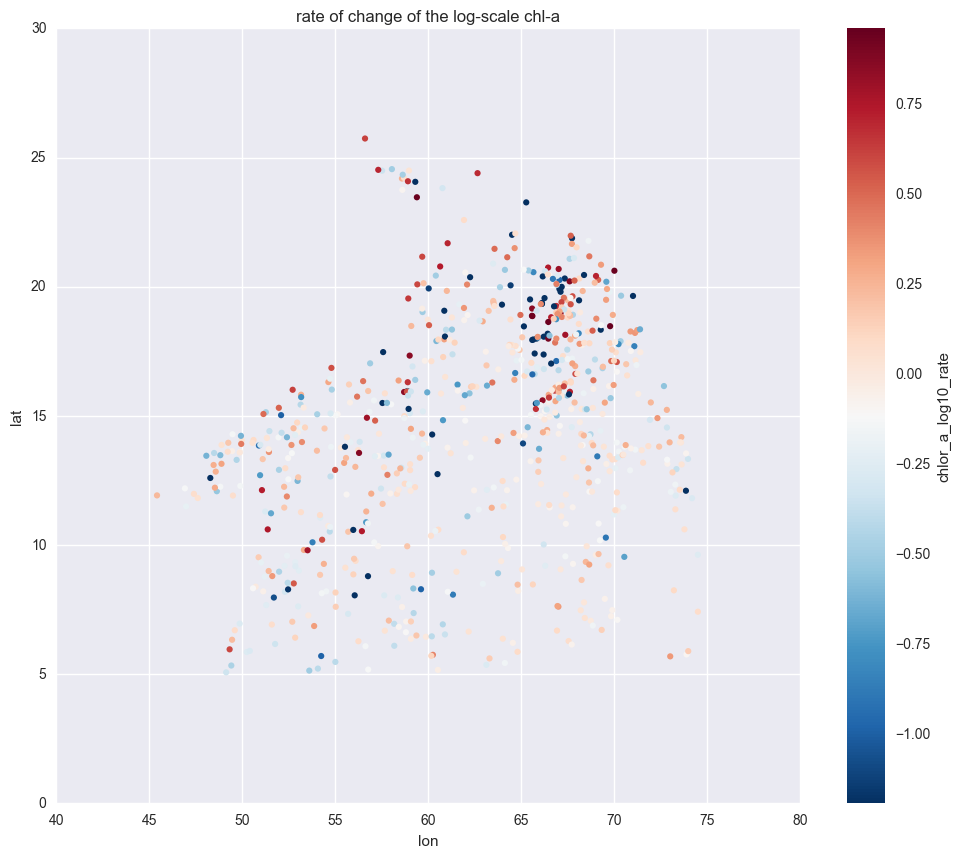

In [6]:
# visualize the ROC of log(chl_a) around the arabian sea region
fig, ax  = plt.subplots(figsize=(12,10))
df_chl_out_5D_3.plot(kind='scatter', x='lon', y='lat', c='chlor_a_log10_rate', cmap='RdBu_r', vmin=check2.median()-0.5*check2.std(), vmax=check2.max(), edgecolor='none', ax=ax, title = 'rate of change of the log-scale chl-a')

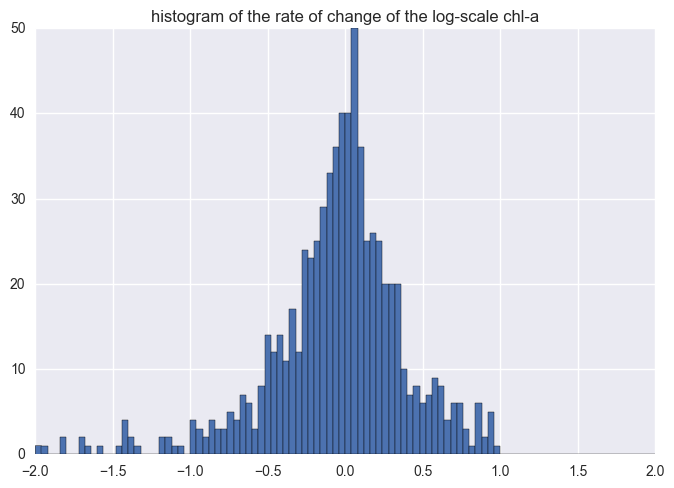

In [7]:
# histogram for non standarized data
axdf_chl = df_chl_out_5D_3.chlor_a_log10_rate.dropna().hist(bins=100,range=[-2,2]) # there are very a few small values on the left
axdf_chl.set_title('histogram of the rate of change of the log-scale chl-a')

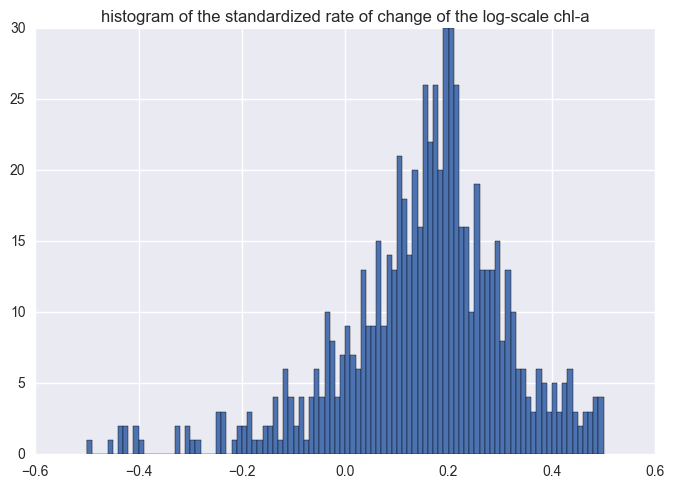

In [8]:
# standarized series
tmp = df_chl_out_5D_3.chlor_a_log10_rate.dropna()
tmp = (tmp - tmp.mean())/tmp.std()
axdf_chl_stdan = tmp.hist(bins=100,range=[-0.5,0.5])   # there are very a few small values on the left
axdf_chl_stdan.set_title('histogram of the standardized rate of change of the log-scale chl-a')

In [9]:
# id:11089, time:2002-11-07"
# (0.194167 - 0.182671) / 0.194167    == 0.059207
df_chl_out_5D_3.sort_values(by=['id', 'time']).head()

,id,time,lon,var_lon,vn,var_tmp,spd,var_lat,temp,lat,ve,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_log10_rate
index,,,,,,,,,,,,,,,,,
5181,10206,2002-11-01,67.400875,0.001188,6.497542,1000.0,11.098375,0.000411,NaN,10.819333,-6.816792,0.132351,-0.878273,-0.011445,NaN,512.041,-0.086475
5440,10206,2002-11-07,67.149208,0.001453,3.659208,1000.0,6.336958,0.000476,NaN,11.107000,-2.266292,0.130267,-0.885166,-0.002084,NaN,540.917,-0.015998
6476,10206,2002-12-01,66.529750,0.003438,5.781167,1000.0,14.679250,0.001004,NaN,11.451333,-13.332292,0.127859,-0.893269,-0.009725,NaN,606.805,-0.076060
7771,10206,2002-12-31,64.004000,0.000999,-4.584875,1000.0,13.410292,0.000361,NaN,12.477292,-12.156875,0.189273,-0.722911,0.015523,-1.809038,890.850,0.082011
8807,10206,2003-01-24,62.110722,0.002644,-8.204294,1000.0,13.179000,0.000795,NaN,11.109556,-10.128765,0.225299,-0.647241,-0.113617,NaN,838.923,-0.504292


In [10]:
# CSV CSV CSV CSV with specfic index
# df_chl_out_5D_3.csv --  {lat, lon, temp, chl_rate, dist}
# df_chl_out_5D_3.csv --  {lat, lon, temp, chl_rate, dist, chlor_a_log10_rate}

# 3 represents 3 features: {temp, chl_rate, dist}
# 4 represents 4 features: {temp, chl_rate, dist, chlor_a_log10_rate }
df_chl_out_5D_3.to_csv('df_chl_out_5D_modisa_4.csv', sep=',', index_label = 'index')

# load CSV output
test = pd.read_csv('df_chl_out_5D_modisa_4.csv', index_col='index')

# a check
test.sort_values(by=['id', 'time']).head()

,id,time,lon,var_lon,vn,var_tmp,spd,var_lat,temp,lat,ve,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_log10_rate
index,,,,,,,,,,,,,,,,,
5181,10206,2002-11-01,67.400875,0.001188,6.497542,1000.0,11.098375,0.000411,NaN,10.819333,-6.816792,0.132351,-0.878273,-0.011445,NaN,512.041,-0.086475
5440,10206,2002-11-07,67.149208,0.001453,3.659208,1000.0,6.336958,0.000476,NaN,11.107000,-2.266292,0.130267,-0.885166,-0.002084,NaN,540.917,-0.015998
6476,10206,2002-12-01,66.529750,0.003438,5.781167,1000.0,14.679250,0.001004,NaN,11.451333,-13.332292,0.127859,-0.893269,-0.009725,NaN,606.805,-0.076060
7771,10206,2002-12-31,64.004000,0.000999,-4.584875,1000.0,13.410292,0.000361,NaN,12.477292,-12.156875,0.189273,-0.722911,0.015523,-1.809038,890.850,0.082011
8807,10206,2003-01-24,62.110722,0.002644,-8.204294,1000.0,13.179000,0.000795,NaN,11.109556,-10.128765,0.225299,-0.647241,-0.113617,NaN,838.923,-0.504292


In [11]:
print("test")

test
